In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3)

In [7]:
x

array([[-0.06450219,  0.80091514],
       [ 1.00867995, -1.25133816],
       [-0.54824025, -0.51540688],
       ...,
       [ 0.2393122 ,  0.04063499],
       [ 2.01463743, -0.68291305],
       [-0.78822878, -0.4024177 ]])

In [8]:
y

array([ 4.12581430e+01, -4.89641505e+01, -3.96629823e+01, -1.35231495e+01,
        8.44076465e+01,  1.40269253e-01, -1.82572110e+01,  1.28518001e+00,
       -1.07636017e+02, -1.19393571e+02, -1.17920000e+01, -4.49814044e+01,
        6.34945888e+01, -8.64024832e+01,  2.22156298e+01, -1.50180493e+01,
        5.33203929e+01,  1.45928496e+01, -8.81352021e+01, -2.15244523e+01,
        2.82226050e+01, -3.24954247e+01,  4.12909606e+01,  4.29999248e+01,
        1.90101673e+01,  1.54460340e+02,  4.26477448e+01,  1.00601701e+02,
        4.36479899e+01, -4.82359809e+01,  3.48809275e+00,  3.02133354e+01,
        1.63182813e+01,  8.56591395e+01, -2.37893410e+01,  1.92746726e+01,
        2.11889544e+01,  4.80939820e+00, -9.74409399e+01, -7.25262608e+01,
        8.14527909e+01,  8.01872940e+01, -4.81253498e+01, -3.03708862e+01,
        1.99393501e+01,  8.40876766e+01,  7.73055658e-01, -1.05124381e+02,
       -3.99819513e+01, -1.51569988e+01, -1.47723975e+02, -3.26862549e+01,
        1.63900179e+02,  

<Axes: xlabel='0', ylabel='1'>

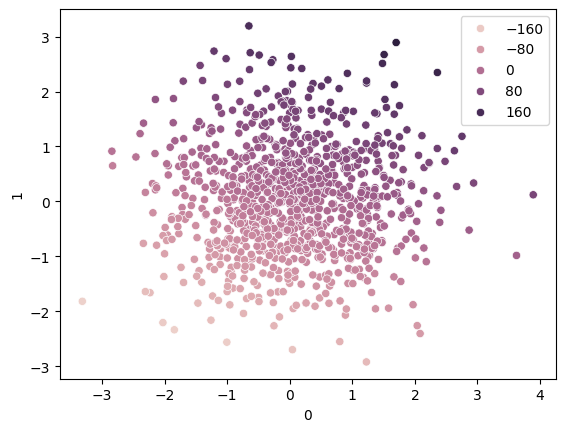

In [10]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=1)

In [12]:
x_train.shape,x_test.shape

((970, 2), (30, 2))

In [13]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr

SVR(kernel='linear')

In [14]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[22.026377  , 53.97233142]])

In [17]:
y_pred=svr.predict(x_test)

In [18]:
y_pred

array([-171.19627124,   27.08845917,  -55.83136054,  -17.01522284,
        -19.77632189,  -27.32176624,  -22.98781234,   82.25367347,
        -73.94512077,  -12.77189021,   -6.39472255, -130.79132637,
          4.61117185,  -55.33606487,   12.42255007,   -0.41720322,
         43.93196101,  -11.29255349,  -21.37146078,  -17.07446783,
        -18.55568861,   -0.77372073,   41.65168264,   31.76345067,
         36.20626679,  -19.5122835 ,  -43.14545612,  -11.48193392,
        -93.4150002 ,  134.84071997])

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9964537964102702

In [21]:
# Hyperparameter Tuning with SVR
from sklearn.model_selection import GridSearchCV
params={'C':[1,2,3,10,50,100],
        'gamma':[1,0.1,0.2,0.001,0.003],
        'kernel':['linear'],
        'epsilon':[0.01,0.1,0.2,0.3]}

In [27]:
grid=GridSearchCV(SVR(),param_grid=params,cv=5,verbose=3)

In [28]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.1s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.997 total time=   0.1s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.997 total time=   0.1s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.997 total time=   0.1s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.997 total time=   0.1s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.1s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.997 total time=   0.1s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.997 total time=   0.1s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.997 total time=   0.1s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.997 total time=   0.1s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kern

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [29]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [31]:
grid.best_score_

np.float64(0.9972381136945814)

In [32]:
final_model=grid.best_estimator_

In [33]:
y_pred=final_model.predict(x_test)

In [34]:
y_pred

array([-171.78856744,   27.14488155,  -56.04029463,  -17.02015939,
        -19.85469757,  -27.36073498,  -23.03982884,   82.54197352,
        -74.12134159,  -12.80332853,   -6.417646  , -131.09737251,
          4.63485995,  -55.50461321,   12.45402524,   -0.4840573 ,
         44.10946772,  -11.23207027,  -21.40325907,  -17.05582551,
        -18.60540231,   -0.74646555,   41.83676748,   31.86291923,
         36.33152894,  -19.577783  ,  -43.3019536 ,  -11.43332898,
        -93.69688932,  135.24414846])

In [35]:
r2_score(y_test,y_pred)

0.9965082020980106